In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import math
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import preprocessing
import ppscore as pps
from sklearn.metrics import mean_squared_error

from copulas.multivariate import VineCopula
from copulas.multivariate import GaussianMultivariate
from copulas.bivariate import Gumbel
from copulas.bivariate import Clayton
from copulas.bivariate import Frank

In [2]:
path = "../Data/"


In [3]:
data = pd.read_csv(path+'final_mean.csv')
data = data.drop("Unnamed: 0",axis=1)
data.head()

,acc,linear_acc,rotation,game_rotation,sound,speed,gravity,light,mag_field,gyr,orient,target
0,9.707576,0.395114,0.695759,0.643702,88.941299,12.106335,9.806641,0.0,45.299669,0.171560,289.098009,0
1,9.585344,0.955568,0.974789,0.575668,89.780316,6.750000,9.806650,1.0,47.775891,0.233873,166.814524,0
2,9.854207,0.221997,0.690608,0.728962,76.264572,9.091069,9.806642,0.0,45.873524,0.045484,292.815815,0
3,9.770933,1.341121,0.209953,0.361046,84.059241,5.368554,9.806649,0.0,45.303640,0.202622,338.585784,0
4,9.874786,0.614802,0.699299,0.746692,78.168628,6.454336,9.806624,0.0,41.311621,0.117408,361.257574,0


In [4]:
df = pd.DataFrame({'orient':data["orient"],'mag_field':data["mag_field"],'target':data["target"]})

In [5]:
df.head()

,orient,mag_field,target
0,289.098009,45.299669,0
1,166.814524,47.775891,0
2,292.815815,45.873524,0
3,338.585784,45.303640,0
4,361.257574,41.311621,0


In [6]:
def NormalizeData(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))

In [7]:
target_label = []
for row in data["target"]:
        if(row == 0):
            target_label.append("a")
        elif(row == 1):
            target_label.append("b")
        elif(row == 2):
            target_label.append("c")
        elif(row == 3):
            target_label.append("d")
        elif(row == 4):
            target_label.append("e")

<IPython.core.display.Javascript object>


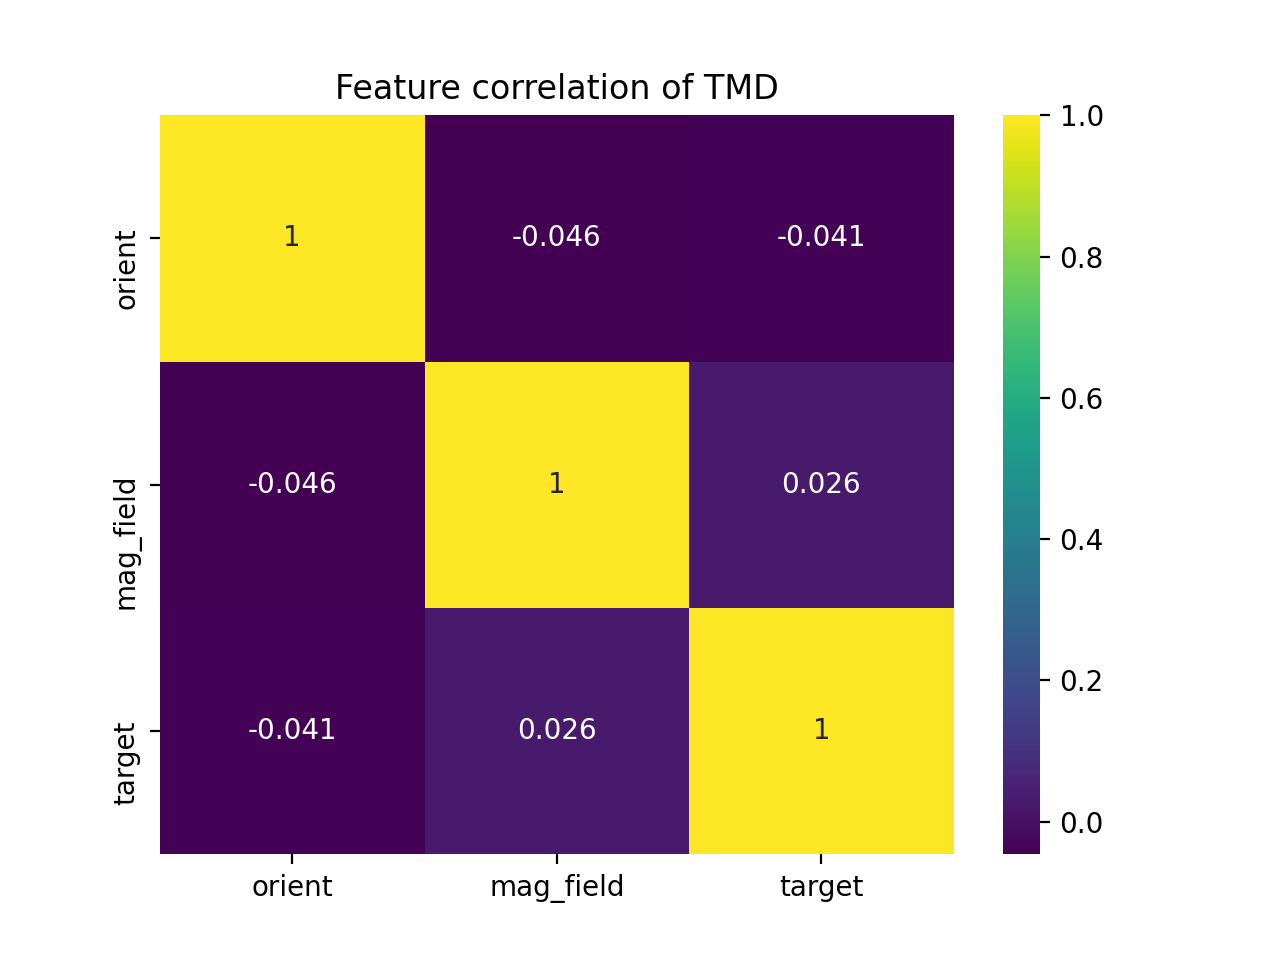

In [8]:
sns.heatmap(df.corr(),annot=True,cmap='viridis')
plt.title("Feature correlation of TMD")
plt.show()

In [10]:
df1 = df
df1["target_label"]=target_label

<IPython.core.display.Javascript object>


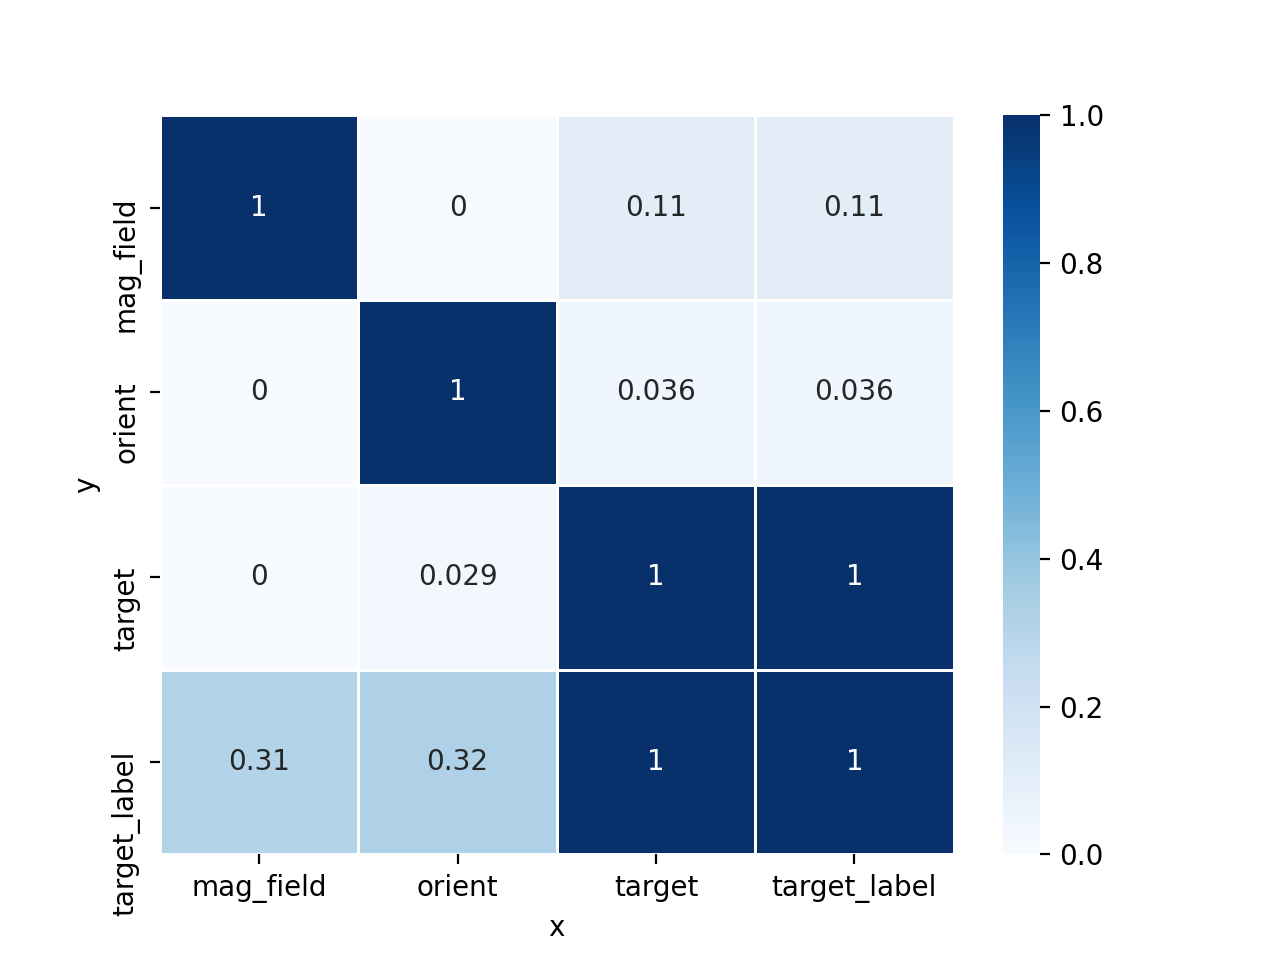

<AxesSubplot:xlabel='x', ylabel='y'>

In [27]:
matrix_df = pps.matrix(df1, sample=5893)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

## Rvine

In [13]:
regular = VineCopula('regular')
regular.fit(df)

/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/multivariate/vine.py:68: UserWarning: Vines have not been fully tested on Python 3.8 and might produce wrong results. Please use Python 3.5, 3.6 or 3.7
  warnings.warn(
/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/bivariate/base.py:160: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn("Data does not appear to be uniform.", category=RuntimeWarning)


In [14]:
parameters = regular.to_dict()
parameters.keys()

dict_keys(['type', 'vine_type', 'fitted', 'n_sample', 'n_var', 'depth', 'truncated', 'trees', 'tau_mat', 'u_matrix', 'unis', 'columns'])

In [15]:
tau_mat = parameters['tau_mat']
tau_mat

[[1.0, -0.03257236355465127], [-0.03257236355465127, 1.0]]

In [16]:
F1 = []
F2 = []
for i in range(len(parameters['u_matrix'])):
    F1.append(parameters['u_matrix'][i][0])
    F2.append(parameters['u_matrix'][i][1])

<IPython.core.display.Javascript object>


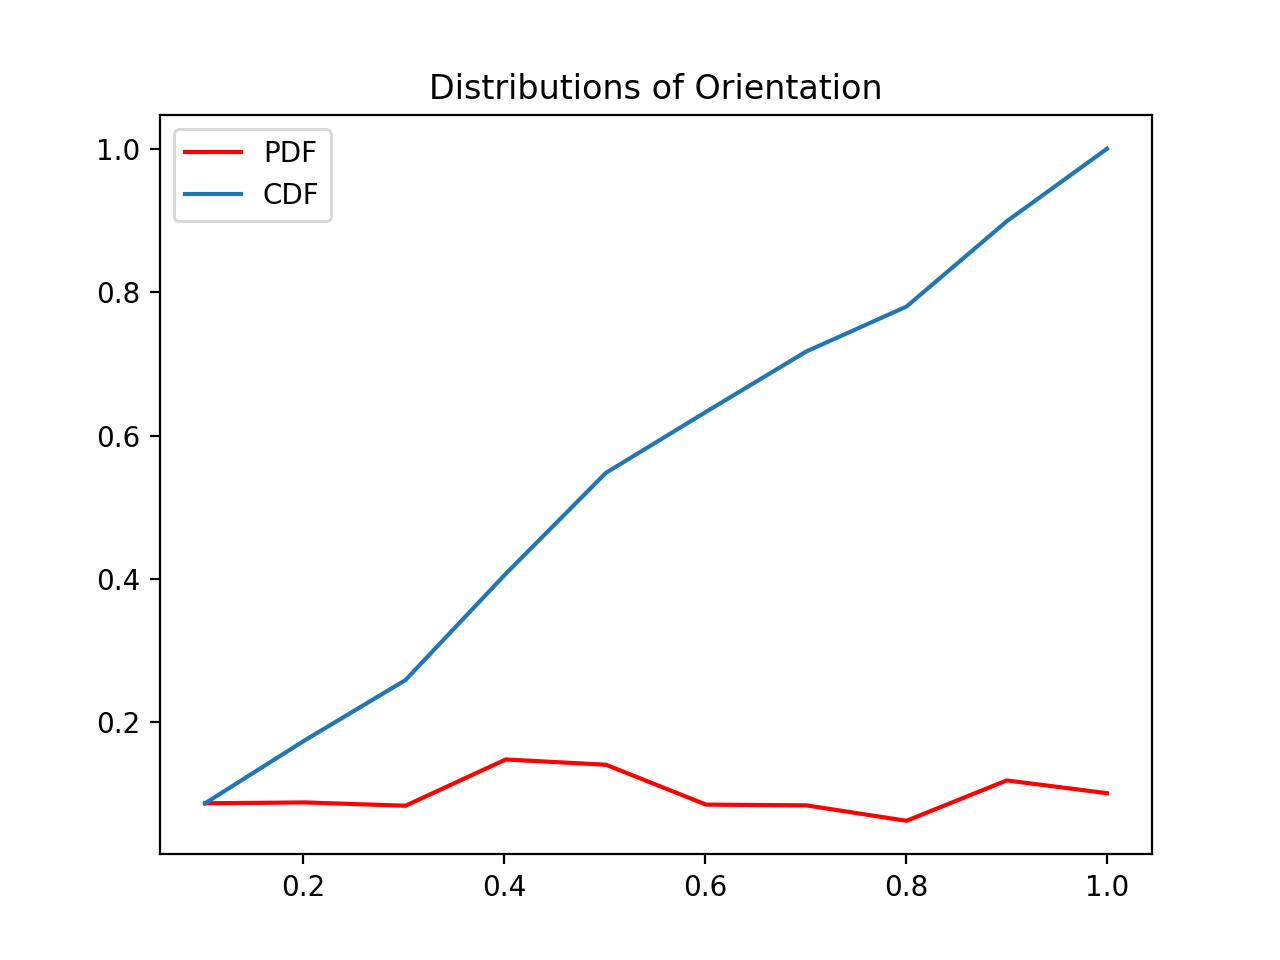

In [33]:
count, bins_count = np.histogram(F2, bins=10)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
plt.title("Distributions of Orientation")
plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>


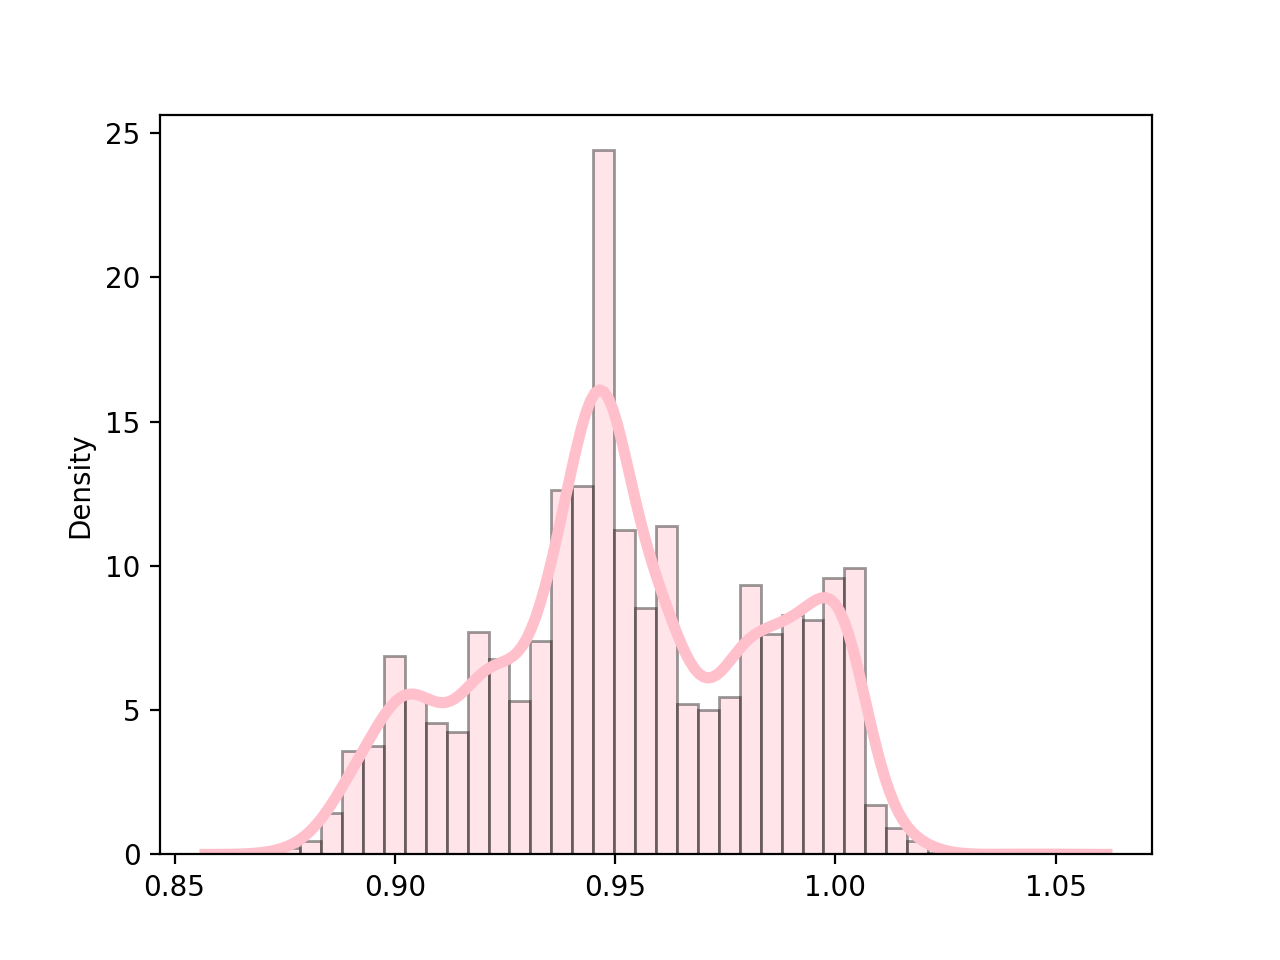

<AxesSubplot:ylabel='Density'>

In [35]:
sns.distplot(frank_fused, hist=True, kde=True, 
             bins=int(180/5), color = 'pink', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [11]:
df = df.drop(["target"],axis=1)

In [12]:
df.head()

,orient,mag_field
0,289.098009,45.299669
1,166.814524,47.775891
2,292.815815,45.873524
3,338.585784,45.303640
4,361.257574,41.311621


In [21]:
X = df.to_numpy()

In [22]:
X = NormalizeData(X)

In [23]:
frank = Frank()
frank.fit(X)
frank_fused = frank.probability_density(X)

/Users/ychukkap/Documents/GitHub/TMD_Multi-Modal/Code/copulas/bivariate/base.py:160: RuntimeWarning: Data does not appear to be uniform.
  warnings.warn("Data does not appear to be uniform.", category=RuntimeWarning)


In [24]:
frank_res = pd.DataFrame({'fused':frank_fused,'target':data['target']})

In [25]:
frank_res["target_label"]=target_label

<IPython.core.display.Javascript object>


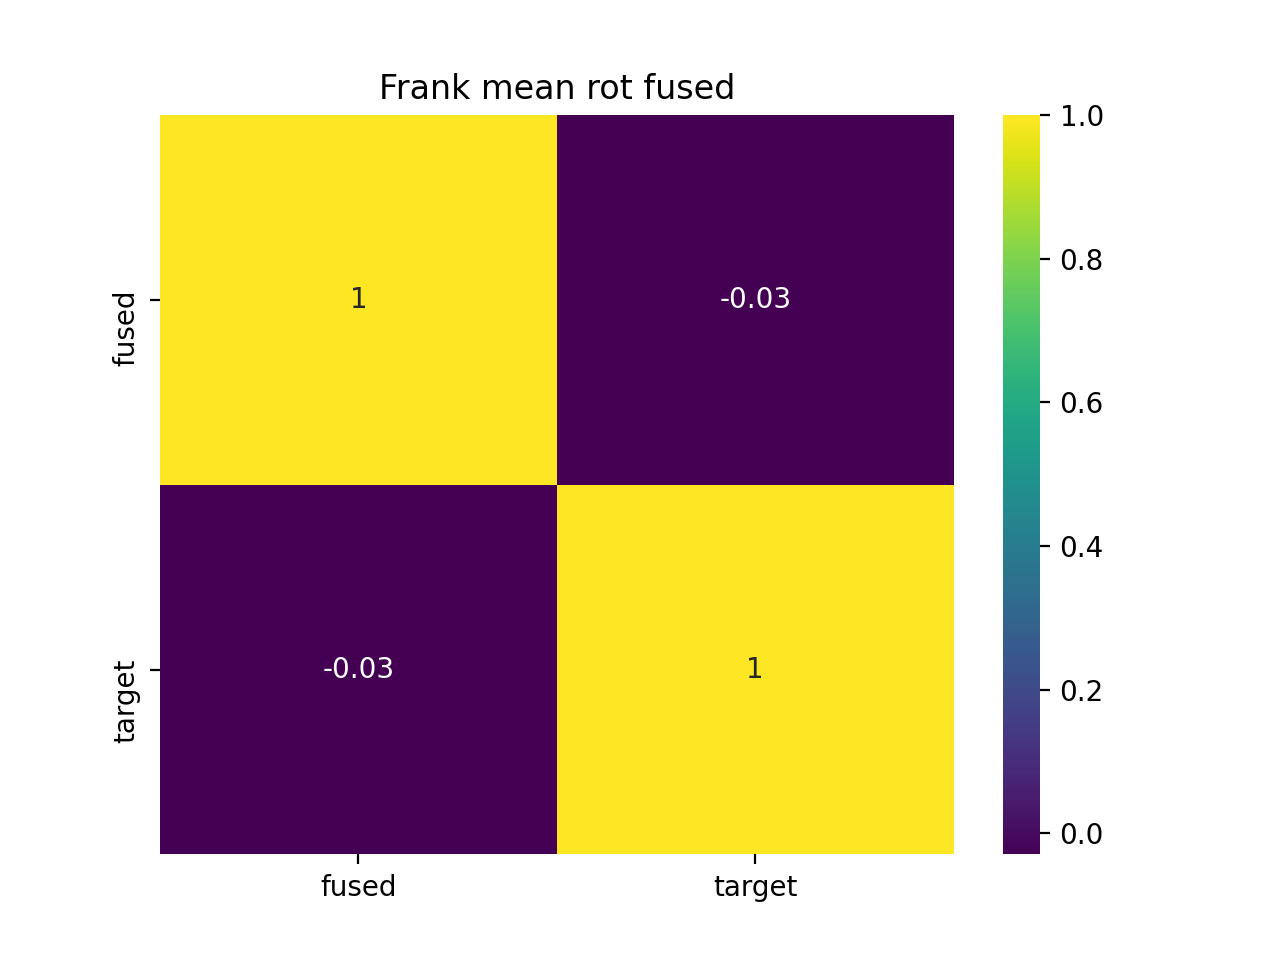

In [26]:
sns.heatmap(frank_res.corr(),annot=True,cmap='viridis')
plt.title("Frank mean rot fused")
plt.show()

<IPython.core.display.Javascript object>


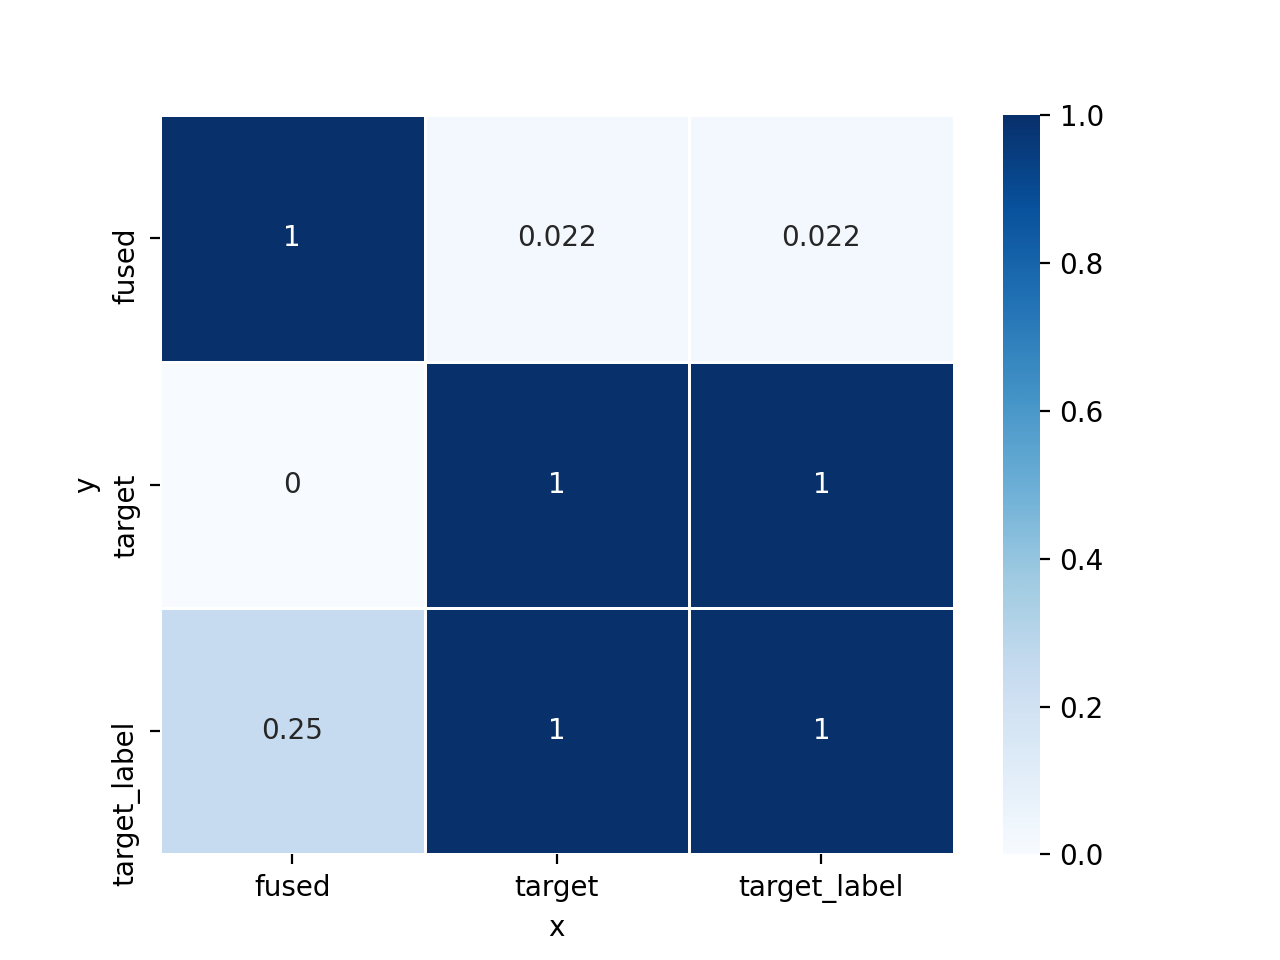

<AxesSubplot:xlabel='x', ylabel='y'>

In [27]:
matrix_df = pps.matrix(frank_res, sample=5893)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')
sns.heatmap(matrix_df, vmin=0, vmax=1, cmap="Blues", linewidths=0.5, annot=True)

In [31]:
frank_res.to_csv('../Data/non_frank.csv')

In [22]:
clayton = Clayton()
clayton.fit(X)
fused = clayton.probability_density(X)

ValueError: The computed theta value -0.0630897449986367 is out of limits for the given CLAYTON copula.

In [21]:
print(fused)

NameError: name 'fused' is not defined

In [20]:
clayton_res = pd.DataFrame({'fused_rot':fused,'target':data['target']})

<IPython.core.display.Javascript object>


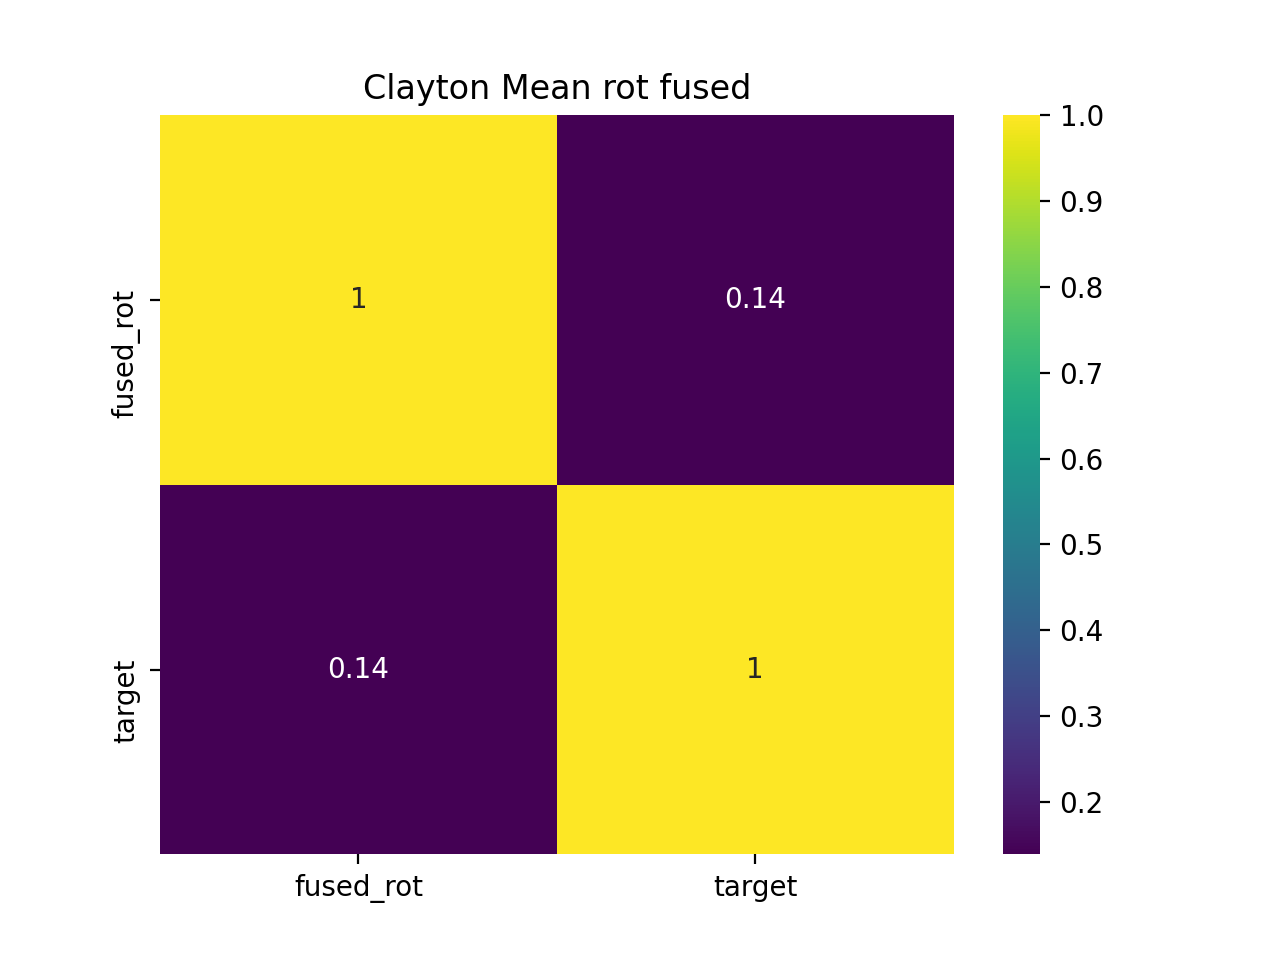

In [28]:
sns.heatmap(clayton_res.corr(),annot=True,cmap='viridis')
plt.title("Clayton Mean rot fused")
plt.show()

### Gumbel

In [23]:
gumbel = Gumbel()
gumbel.fit(X)
fused = gumbel.probability_density(X)

ValueError: The computed theta value 0.9684551275006816 is out of limits for the given GUMBEL copula.

In [23]:
print(fused)

[1.26793642 0.47129478 1.32878842 ... 1.83327839 1.06370009 2.27044007]


In [24]:
gumbel_res = pd.DataFrame({'fused_rot':fused,'target':data['target']})

<IPython.core.display.Javascript object>


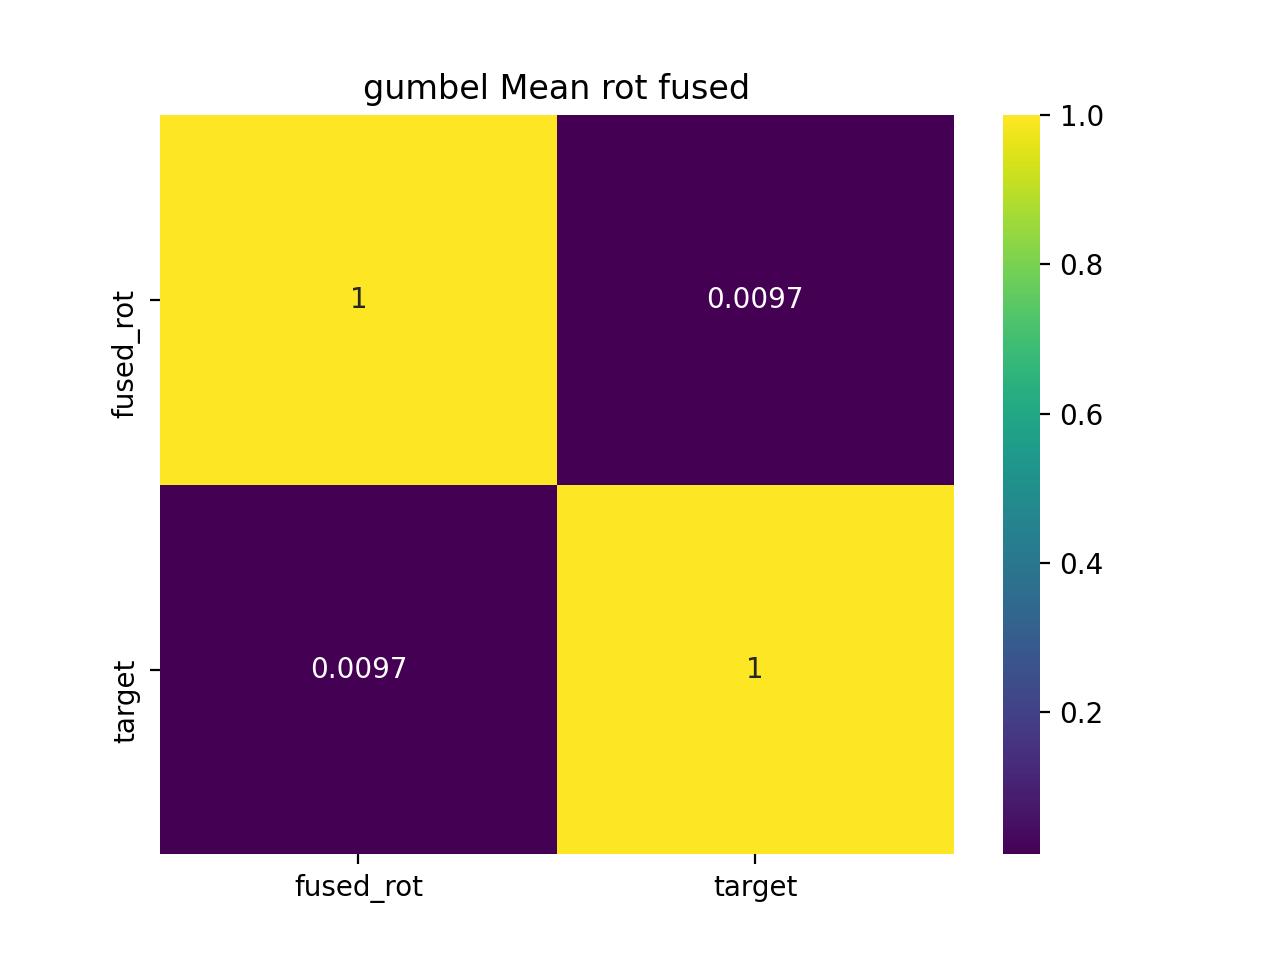

In [29]:
sns.heatmap(gumbel_res.corr(),annot=True,cmap='viridis')
plt.title("gumbel Mean rot fused")
plt.show()